# World Happiness Report Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.drop(columns=["Happiness Rank","Standard Error","Dystopia Residual"],inplace= True)

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

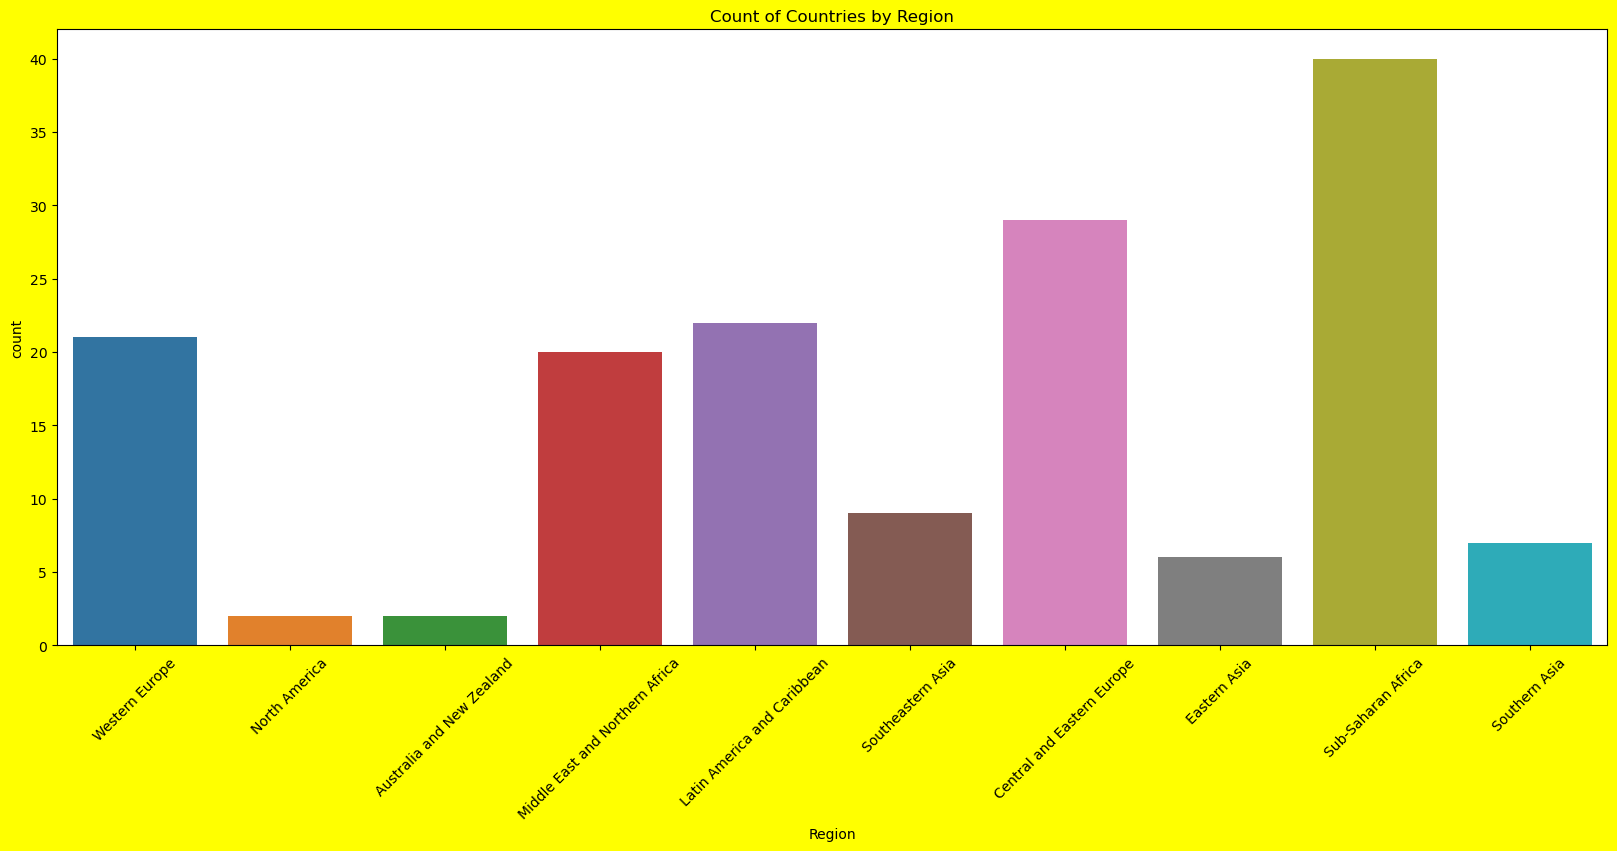

In [10]:
plt.figure(figsize=(20,8),facecolor='yellow')
count_region= sns.countplot(data=df, x= "Region")
plt.xticks(rotation=45)
count_region.set_title("Count of Countries by Region")
plt.show()

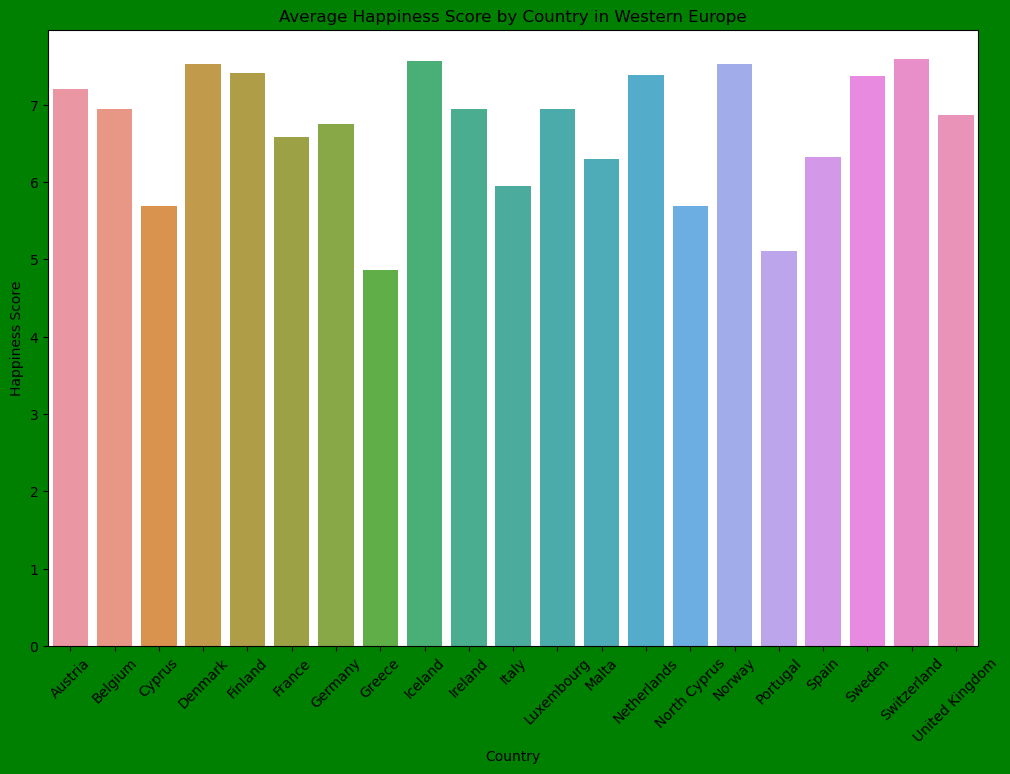

In [11]:
europe= df[df.Region== "Western Europe"]
by_country= europe.groupby("Country",as_index= False)
happiness_by_country= by_country["Happiness Score"].mean()
plt.figure(figsize=(12,8),facecolor='green')
barplot=sns.barplot(x="Country",y="Happiness Score", data=happiness_by_country)
barplot.set_title("Average Happiness Score by Country in Western Europe")
plt.xticks(rotation=45)
plt.show()

This visualization shows that the happiness score in switzerland,iceland and denmark has the highest happiness score in western europe

#checking the outliers

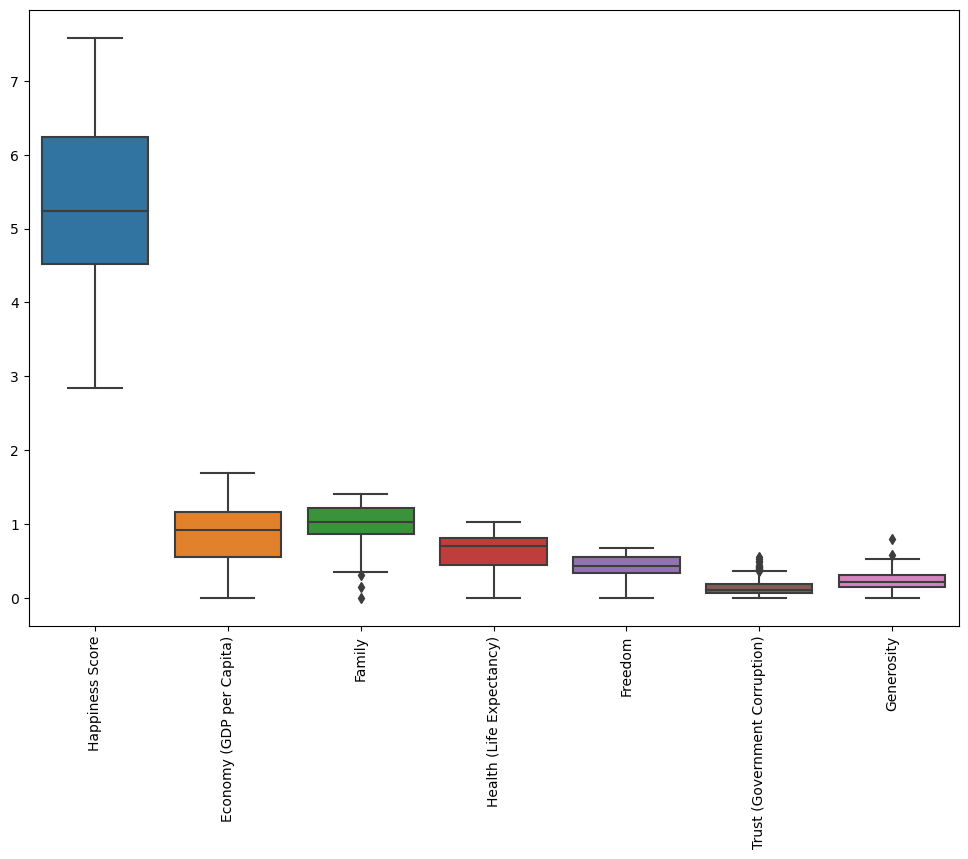

In [12]:
plt.figure(figsize=(12,8))
ax= sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

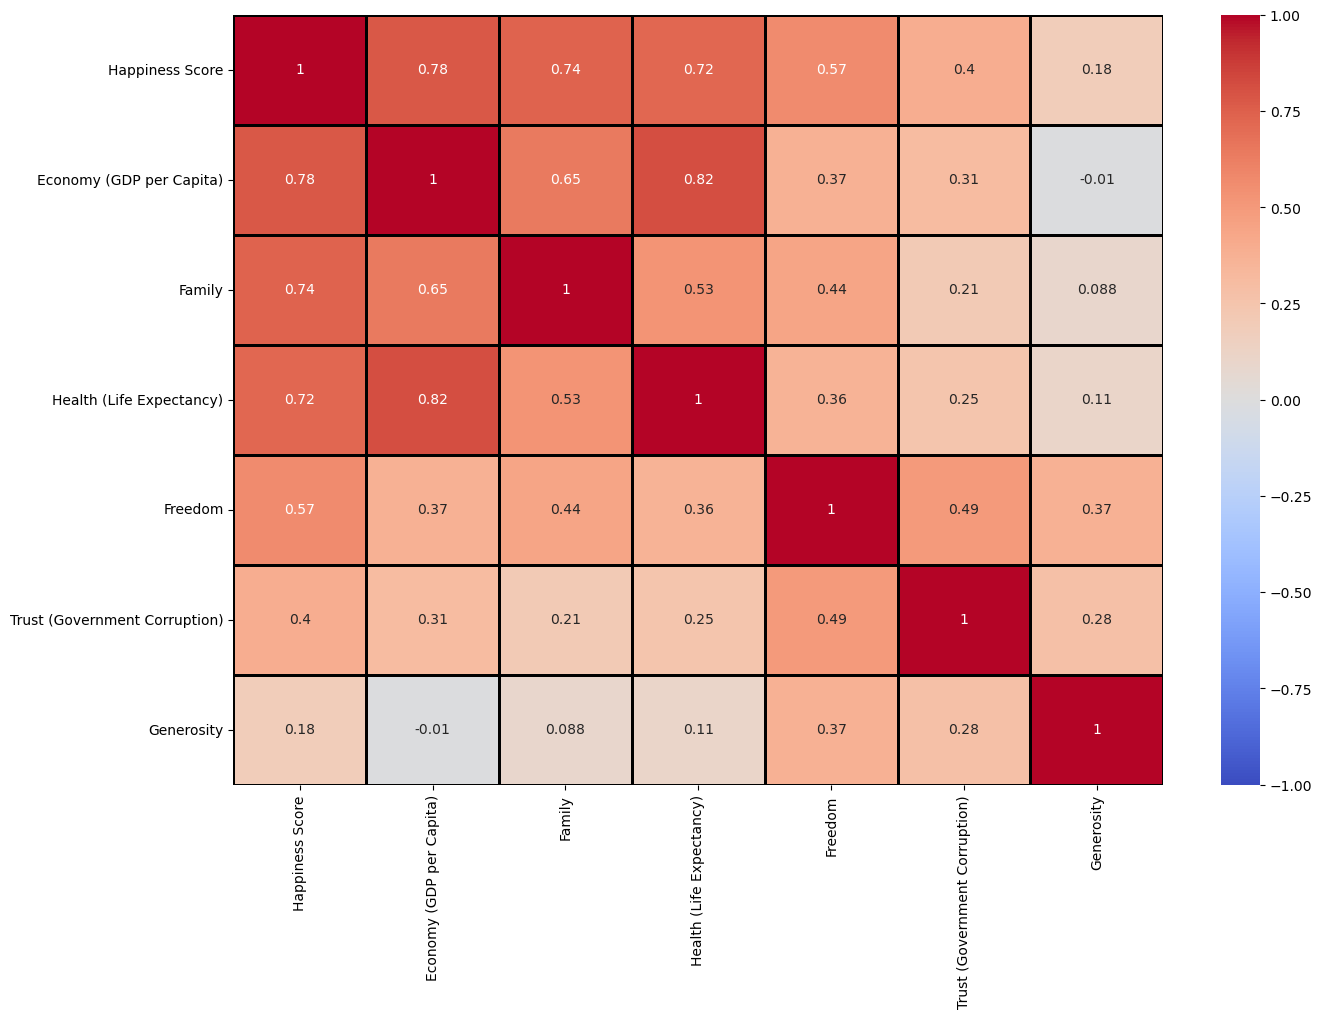

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,vmin=-1, vmax=1,cmap='coolwarm',linewidths=2,linecolor='black')
plt.show()

It shows the strong correlation between happiness score, Economy and health whereas it has a low correlation with trust and generosity.

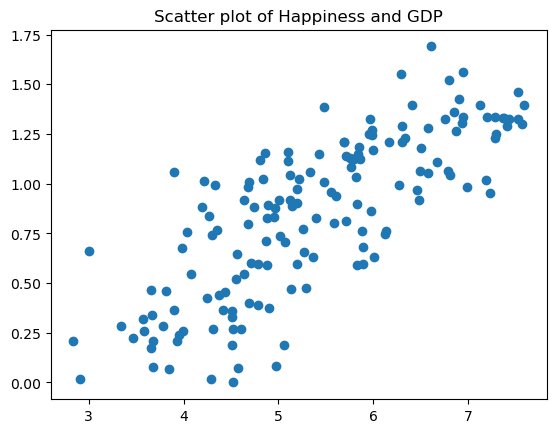

In [14]:
happiness_score= df['Happiness Score']
gdp= df['Economy (GDP per Capita)']
plt.scatter(happiness_score,gdp)
plt.title("Scatter plot of Happiness and GDP")
plt.xlabel= ['Happiness Score']
plt.ylabel= ['Economy (GDP per Capita)']
plt.show()


It shows that the countries with high GDP are much happier.

In [15]:
rich_countries= df[['Country','Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by= 'Economy (GDP per Capita)',ascending= False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [16]:
Healthy_countries= df[['Country','Health (Life Expectancy)']].sort_values(by= 'Health (Life Expectancy)',ascending= False)
Healthy_countries.head()


,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [17]:
low_life_expectancy= df[['Country','Health (Life Expectancy)']].sort_values(by= 'Health (Life Expectancy)',ascending= True)
low_life_expectancy.head()

,Country,Health (Life Expectancy)
122,Sierra Leone,0.00000
127,Botswana,0.04776
147,Central African Republic,0.06699
100,Swaziland,0.07566
96,Lesotho,0.07612


In [18]:
X= df[['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom']]
y= df['Happiness Score']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state= 0)

The data is split into training and test sets.

In [19]:
scale= StandardScaler()
df= scale.fit_transform(X)

After standardization we can train the algorithm and make prediction on the test data to compare actual values with the predicted values. 

In [20]:
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
coefficient= lm.coef_
coefficient_df= pd.DataFrame(list(zip(X.columns,lm.coef_)),columns=['features','coefficients'])
coefficient_df

,features,coefficients
0,Economy (GDP per Capita),0.914757
1,Family,1.418679
2,Health (Life Expectancy),0.902836
3,Freedom,1.934132


In [22]:
y_pred = lm.predict(X_test)
y_pred

array([6.94977382, 6.00173856, 4.4486987 , 4.61392229, 5.91234477,
       4.2521346 , 4.07386374, 3.9187213 , 4.7106378 , 5.37757708,
       6.24515925, 4.62738208, 6.04105412, 6.03073952, 3.63518555,
       6.00483871, 4.4732444 , 5.03994486, 5.06730069, 5.71077711,
       6.60459724, 6.22682362, 6.37986186, 6.87685318, 6.22785414,
       6.07084913, 5.12373313, 6.67848402, 4.94850258, 4.11217429,
       4.98139199, 6.66097864])

#Model Accuracy

In [26]:
accuracy= np.sqrt(MSE(y_test,y_pred))
accuracy

0.5937109307075934

The model has a Root Mean Squared Error of 0.59. The lower the RMSE, the better the model is at making prediction.

# Titanic Survived Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error as MSE

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dd_sv_cnt= pd.crosstab(df['Survived'],df['Sex'],margins= True)
dd_sv_cnt

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [7]:
class_gen_cnt= pd.crosstab(df['Sex'],df['Pclass'],margins=True)
class_gen_cnt

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
age_missing= df[df['Age'].isna()]
age_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
with_age= df[df['Age'].notnull()]
with_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
max(df['Fare'])

512.3292

In [12]:
max_= df[df.Fare==max(df['Fare'])]
max_

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [13]:
class1_female=df[df.Pclass.isin([1]) & df.Sex.isin(['female'])]
class1_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


,Sex,Survived
0,female,0.742038
1,male,0.188908


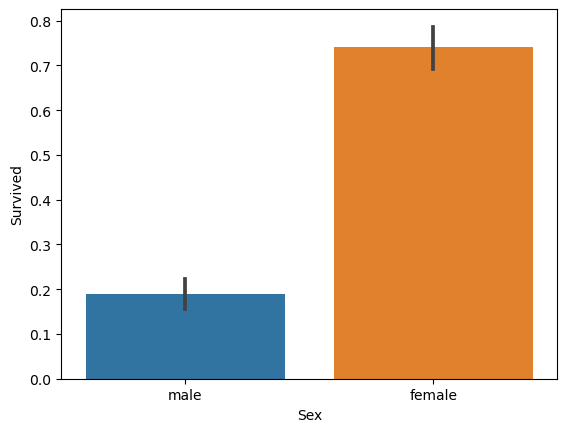

In [14]:
sns.barplot(x='Sex', y= 'Survived',data=df)
df.groupby('Sex',as_index= False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


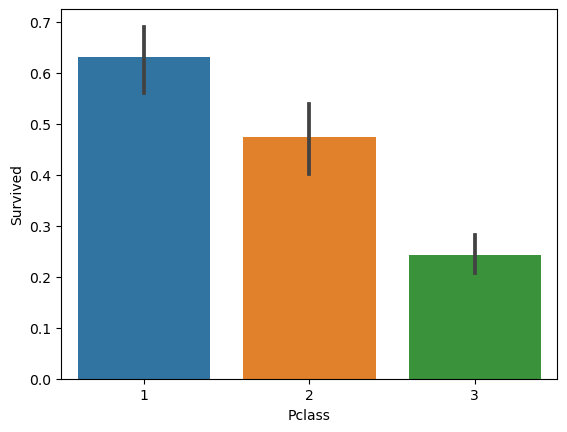

In [15]:
sns.barplot(x='Pclass', y='Survived',data=df)
df[["Pclass", "Survived"]]. groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


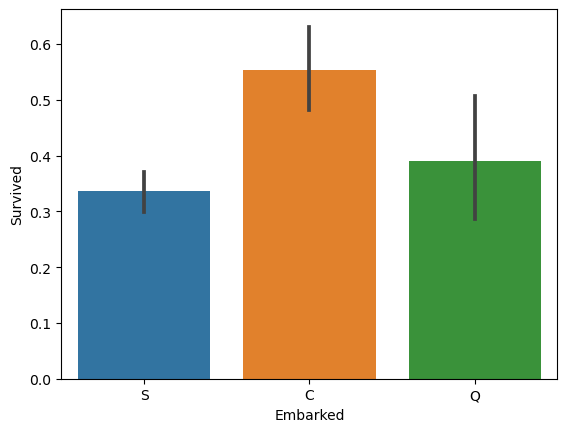

In [16]:
sns.barplot(x='Embarked',y='Survived',data=df)
df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by="Survived",ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


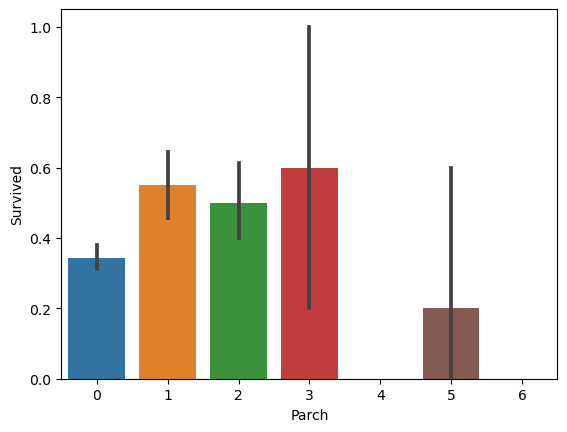

In [17]:
sns.barplot(x='Parch',y= 'Survived',data=df)
df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


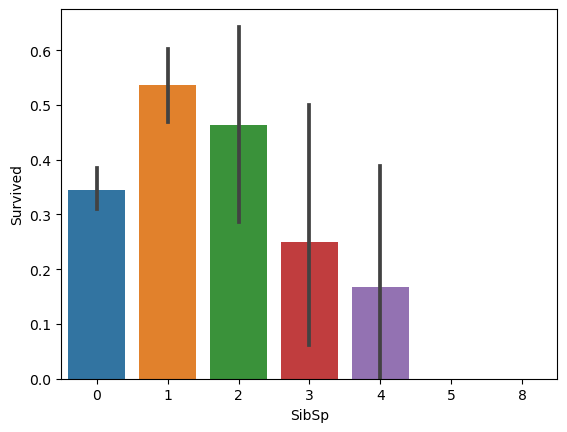

In [18]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

In [19]:
df.Embarked.fillna('S',inplace=True)

Most people embarked the journey from Southhampton port therefore filling S in the missing values.

Mean is:  32.2042079685746
Median is:  14.4542


C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


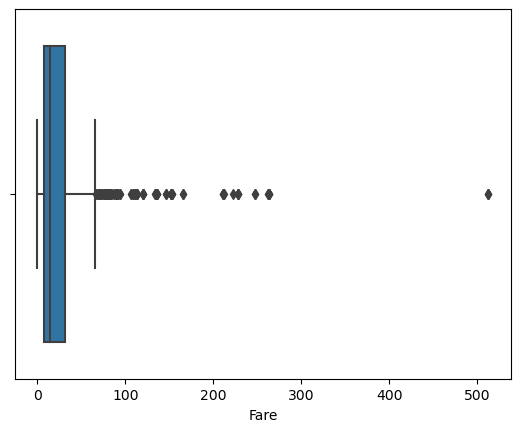

In [20]:
sns.boxplot("Fare",data=df)
print('Mean is: ',df.Fare.mean())
print('Median is: ',df.Fare.median())

In [21]:
df.Age.fillna(28, inplace=True)

In [22]:
df.drop(columns=['Cabin','Embarked','Name','Sex','Ticket'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
X= df.drop(columns=["Survived"],axis=1)
y=df["Survived"]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [24]:
scale= StandardScaler()
df= scale.fit_transform(X)

In [25]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred= lm.predict(X_test)


In [28]:
(f"accuracy Score: {np.sqrt(MSE(y_test,y_pred))*100: .2f}%")

'accuracy Score:  44.11%'